# Groupby & Aggregate using Pandas


Blog: http://akshaysehgal.com/groupby.html

`python` `pandas` `groupby` `aggregate` 
<a href="http://akshaysehgal.com/"><span class="copyright" style="float:right; font-size:x-small; color:#333333; margin-top: 5px;">&copy; Copyright 2017, Akshay Sehgal | 3<sup>rd</sup> Oct 21</span></a>
    
-------

### Table of contents:

1. [Introduction](#1.-Introduction)<br>
2. [Syntax](#2.-Syntax)<br>
    2.1 [Adding more groups/levels](#2.1-Adding-more-groups/levels)<br>
    2.2 [Adding more variables/features](#2.2-Adding-more-variables/features)<br>
3. [Grouping](#3.-Grouping)<br>
4. [Aggregation](#4.-Aggregation)<br>
    4.1 [In-built aggregation methods](#4.1-In-built-aggregation-methods)<br>
    4.2 [Custom functions with pandas apply](#4.2-Custom-functions-with-pandas-apply)<br>
    4.3 [Multiple aggregations using agg method](#4.3-Multiple-aggregations-using-agg-method)<br>
    4.4 [Custom functions with agg method](#4.4-Custom-functions-with-agg-method)<br>
5. [Transform](#5.-Transform)<br>
6. [Advanced Usage](#6.-Advanced-Usage)<br>
    6.1 [Sequential/local grouping of a dataframe](#6.1-Sequential/local-grouping-of-a-dataframe)<br>
    6.2 [Re-indexing to a fixed date range for each group](#6.2-Re-indexing-to-a-fixed-date-range-for-each-group)<br>
7. [Other ways of grouping data](#7.-Other-ways-of-grouping-data)<br>
    7.1 [Using collections' defaultdict](#7.1-Using-collections'-defaultdict)<br>
    7.2 [Using numpy's split function](#7.2-Using-numpy's-split-function)<br>
    7.3 [Using itertools' groupby](#7.3-Using-itertools'-groupby)<br>
8. [References](#8.-References)<br>










## 1. Introduction

"Groupby" is probably one of the most basic data pre-processing step that a Data Scientist should master as soon as possible. Interestingly enough, you find it in almost every scripting language that claims to work well with databases. 

Most of us would have been introduced to the `SQL GROUPBY` statement which allows a user to summarize or aggregate a given dataset. Python brings the pandas groupby method to the table, which is highly pythonic in its syntax and equally versatile, if not more. But the utility of a groupby is much more than just aggregation. In this notebook, I will showcase a few examples, where you could really exploit this method for various other use-cases.

```python
#SQL Query to groupby Col1 and Col2
#and get mean and sum of col3 and col 4 respectively

SELECT Col1, Col2, mean(Col3), sum(Col4)
FROM Table
GROUP BY Col1, Col2
```

Before we can start writing code, let's explore the basics behind a groupby operation. The core concept behind any groupby operation is a three step process called [Split-Apply-Combine](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html).

- **Split:** Splitting the data into groups based on some criteria
- **Apply:** Applying a function to each group independently
- **Combine:** Combining the results into a data structure

Here is a diagram to make this more intuitive.

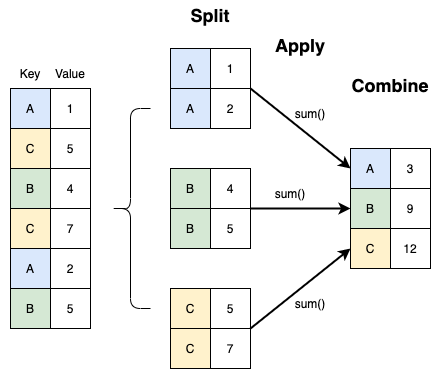

## 2. Syntax


The syntax for using a groupby method in Pandas comprises of 2 parts. First is a grouper object and the second is the aggregator. The general structure looks like the following - 

```
dataset.groupby(['grouping column(s)'])['output column(s)'].aggregation()
|____________________________________| |________________________________|
                   |                                    |
        grouper object (split)            aggregation (apply & combine)
```

This will get more clear as we take an example from actual data. So, let's start by loading a dataset to work with. For this notebook I will use the Titanic dataset which can either be downloaded from [Kaggle](https://www.kaggle.com/c/titanic), or directly loaded using the visualization library called [Seaborn](https://github.com/mwaskom/seaborn-data).

In [1]:
#Load dependencies
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
path = "../input/titanic-data-for-data-preprocessing/titanic_data.csv"
titanic = pd.read_csv(path).dropna() #drop missing data

print(titanic.shape)
titanic.head()

(182, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True


**Question:** What is the total number of passengers from each class who survived?

In [3]:
#Step 1: Create grouper
grouper = titanic.groupby(['class'])

#Step 2: Filter column and apply aggregation
grouper['survived'].sum().reset_index()

,class,survived
0,First,106
1,Second,12
2,Third,5


You would usually do this in a single statement as the following:

In [4]:
titanic.groupby(['class'])['survived'].sum().reset_index()

,class,survived
0,First,106
1,Second,12
2,Third,5


> **Note:** The `reset_index()` helps bring the grouping columns from index, back as a column in a dataframe.

**Question:** What was the average fare for passengers from each town?

In [5]:
titanic.groupby(['embark_town'])['fare'].mean().reset_index()

,embark_town,fare
0,Cherbourg,103.342503
1,Queenstown,90.000000
2,Southampton,64.922862


### 2.1 Adding more groups/levels

We can pass a list of features in the `groupby()` to increase the levels for grouping the data as below.

**Question:** What was the average fare for male vs female passengers from each town?

In [6]:
titanic.groupby(['embark_town','sex'])['fare'].mean().reset_index()

,embark_town,sex,fare
0,Cherbourg,female,104.169609
1,Cherbourg,male,102.435355
2,Queenstown,female,90.000000
3,Queenstown,male,90.000000
4,Southampton,female,79.251179
5,Southampton,male,52.674461


### 2.2 Adding more variables/features

Similarly, we can select a list of variables for which you need to apply the aggreate function.

**Question:** What was the average fare and age for male vs female passengers from each town?

In [7]:
titanic.groupby(['embark_town','sex'])[['fare', 'age']].mean().reset_index()

,embark_town,sex,fare,age
0,Cherbourg,female,104.169609,35.352941
1,Cherbourg,male,102.435355,39.774194
2,Queenstown,female,90.000000,33.000000
3,Queenstown,male,90.000000,44.000000
4,Southampton,female,79.251179,30.952830
5,Southampton,male,52.674461,37.595484


## 3. Grouping

Before we go further and try other, more complex scenarios, let's try to understand the data structures we are working with, so that we can be much more creative with our approaches and get a deeper understanding on how they work. 

You can imagine the pipeline of the above code to be as - 

- **Step 1:** Create a grouper object with `titanic.groupby(['embark_town'])` which splits data into the relevant groups
- **Step 2:** Select the column `'fare'` from each of those groups
- **Step 3:** Apply `mean()` on this column for each of the groups, combine and then return the aggregated dataset


Let's see what the [grouper object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Grouper.html) looks like for a better understanding.

In [8]:
grouper = titanic.groupby(['embark_town'])

#Print dtype for each of the elements in the grouper
[(type(k),type(g)) for k,g in grouper]

[(str, pandas.core.frame.DataFrame),
 (str, pandas.core.frame.DataFrame),
 (str, pandas.core.frame.DataFrame)]

So, this shows that if we try to iterate over the grouper object, its nothing but a tuple with the key and a dataframe. 

Let's see what each of those is.

In [9]:
#Print shape for the dataframe groups
[(k,g.shape) for k,g in grouper]

[('Cherbourg', (65, 15)), ('Queenstown', (2, 15)), ('Southampton', (115, 15))]

The key for each of the tuples/groups is the value from the grouper column (in this case the `embark_town`) and the value is just the complete dataframe filtered for that value! If we try to print one of the dataframe from this grouper, you can see that all the rows in this slice of data contain `Queenstown` as the `embark_town`, as shown below.

In [10]:
print(list(grouper)[1][0]) #print key
list(grouper)[1][1]        #print dataframe

Queenstown


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
244,0,1,male,44.0,2,0,90.0,Q,First,man,True,C,Queenstown,no,False
411,1,1,female,33.0,1,0,90.0,Q,First,woman,False,C,Queenstown,yes,False


Similarly, let's see how the grouper object looks like for multiple grouping features. The 'key' in this case is just a tuple with all the group combinations, which, after aggregation, gets set as the index of the final output.

In [11]:
grouper = titanic.groupby(['embark_town','sex'])

#Print dtype for each of the elements in the grouper
[(k,g.shape) for k,g in grouper]

[(('Cherbourg', 'female'), (34, 15)),
 (('Cherbourg', 'male'), (31, 15)),
 (('Queenstown', 'female'), (1, 15)),
 (('Queenstown', 'male'), (1, 15)),
 (('Southampton', 'female'), (53, 15)),
 (('Southampton', 'male'), (62, 15))]

In [12]:
#The grouping columns become the index after the groupby aggregation
titanic.groupby(['embark_town','sex'])['age'].mean()

embark_town  sex   
Cherbourg    female    35.352941
             male      39.774194
Queenstown   female    33.000000
             male      44.000000
Southampton  female    30.952830
             male      37.595484
Name: age, dtype: float64

## 4. Aggregation

There are multiple ways of aggregating your grouper object. 

1. First part of this section is to understand that you can perform aggregations on multiple columns, OR, perform multiple aggregations themselves on different columns, or a combination of both.
2. Second, you can use `apply()` or `agg()` to write your own custom aggregators but Pandas makes it much easier by providing a ton of in-built aggregators such as `sum()` or `mean()` as we discussed in the above examples.

Let's try to go through a few scenarios and explore how we can use these aggregations.

### 4.1 In-built aggregation methods

Pandas provides a ton of aggregation methods to quickly get the statistics you are looking for. Below are a few of the common ones that are use and more details on these can be found on the official [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html).

|Function   | Description
|:----------|----------------------------------------------|
|mean( )    | Compute mean of groups|
|median( )  | Compute median of groups|
|mode( )    | Compute mode of groups|
|sum( )     | Compute sum of group values|
|prod( )    | Compute product of group values|
|size( )    | Compute group sizes|
|count( )   | Compute count of group|
|std( )     | Standard deviation of groups|
|var( )     | Compute variance of groups|
|skew( )    | Compute skewness/3rd moment of groups|
|kurt( )    | Compute kurtosis/4th moment of groups|
|sem( )     | Standard error of the mean of groups|
|mad( )     | Mean absolute deviation for each group|
|describe( )| Generates descriptive statistics|
|first( )   | Compute first of group values|
|last( )    | Compute last of group values|
|nth( )     | Take nth value, or a subset if n is a list|
|min( )     | Compute min of group values|
|max( )     | Compute max of group values|

### 4.2 Custom functions with pandas apply

This is by far the most popular way of applying a custom function to a dataframe, or in this case, applying it on each of the dataframe slices for groups defined by the grouper. The behavior of the `apply()` method with groupby is similar to the standard one. 

You can apply it to each row (or column) of a dataframe input (if you have more than one column for aggregation) or to a series (if you have single column for aggregation). Within the function, you can actually either work directly with individual series or just write your own lambda function. Here are a few ways using the [apply](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.GroupBy.apply.html) function.

**Question:** Get the unique set of ages for all each age category (`who` column) from each town.

In [13]:
titanic.groupby(['embark_town', 'who'])['age'].apply(set).reset_index()

,embark_town,who,age
0,Cherbourg,man,"{17.0, 18.0, 23.0, 24.0, 25.0, 26.0, 27.0, 30...."
1,Cherbourg,woman,"{16.0, 17.0, 18.0, 19.0, 21.0, 22.0, 23.0, 24...."
2,Queenstown,man,{44.0}
3,Queenstown,woman,{33.0}
4,Southampton,child,"{0.92, 1.0, 2.0, 3.0, 4.0, 6.0, 11.0, 14.0, 15.0}"
5,Southampton,man,"{19.0, 21.0, 25.0, 27.0, 28.0, 29.0, 31.0, 32...."
6,Southampton,woman,"{16.0, 17.0, 18.0, 19.0, 21.0, 22.0, 23.0, 24...."


**Question:** Get the range (min - max) of ages for each age category (`who` column) from each town.

In [14]:
titanic.groupby(['embark_town', 'who'])['age'].apply(lambda x: x.max()-x.min()).reset_index()

,embark_town,who,age
0,Cherbourg,man,54.00
1,Cherbourg,woman,44.00
2,Queenstown,man,0.00
3,Queenstown,woman,0.00
4,Southampton,child,14.08
5,Southampton,man,61.00
6,Southampton,woman,47.00


**Question:** Get the mean fare by age ratio for each age category (`who` column) from each town.

In [15]:
titanic.groupby(['embark_town', 'who']).apply(lambda x: (x['fare']/x['age']).mean())

embark_town  who  
Cherbourg    man       3.146083
             woman     3.614103
Queenstown   man       2.045455
             woman     2.727273
Southampton  child    28.956893
             man       1.410745
             woman     2.593897
dtype: float64

### 4.3 Multiple aggregations using agg method

Sooner or later, you would find it necessary to work with multiple aggregations over multiple columns at once. This is where `agg()` method comes in. Here is a quick example of how you can use multiple in-built functions over multiple columns at once.

The general way to do this is to create a dictionary with the requirements and pass it to the `agg()` function. There are a few ways to structure the dictionary - 

```
##Single function per column
{
 'column1': 'function1', 
 'column2': 'function2'
}

##Multiple functions per column
{
 'column1': ['function1', 'function2'], 
 'column2': ['function3', 'function4']
}
```

**Question:** Get the mean of fare, AND median of age for each age category (`who` column) from each town

In [16]:
#Define aggregations as a dictionary
g = {'fare':'mean', 
     'age':'median'
    }

titanic.groupby(['embark_town', 'who']).agg(g).reset_index()

,embark_town,who,fare,age
0,Cherbourg,man,102.435355,36.0
1,Cherbourg,woman,104.169609,37.0
2,Queenstown,man,90.000000,44.0
3,Queenstown,woman,90.000000,33.0
4,Southampton,child,77.379485,4.0
5,Southampton,man,51.071515,40.0
6,Southampton,woman,77.686436,33.0


**Question:** Get the sum & mean of fare, AND median, min and max of age for each age category (`who` column) from each town

In [17]:
#Define aggregations as a dictionary
g = {'fare':['sum', 'mean'], 
     'age':['median', 'min', 'max']
    }

titanic.groupby(['embark_town', 'who']).agg(g).reset_index()

embark_town    who       fare                age             
                             sum        mean median    min   max
0    Cherbourg    man  3175.4960  102.435355   36.0  17.00  71.0
1    Cherbourg  woman  3541.7667  104.169609   37.0  16.00  60.0
2   Queenstown    man    90.0000   90.000000   44.0  44.00  44.0
3   Queenstown  woman    90.0000   90.000000   33.0  33.00  33.0
4  Southampton  child  1005.9333   77.379485    4.0   0.92  15.0
5  Southampton    man  2808.9333   51.071515   40.0  19.00  80.0
6  Southampton  woman  3651.2625   77.686436   33.0  16.00  63.0

As of **Pandas >= 0.25**, another way to define the `agg` function is define the each column with `('column', 'function')`. 
> **NOTE:** This may throw and error on Kaggle (pandas version ~ 0.23, check `pd.__version__`)

**Question:** Get the sum & mean of fare, AND min and max of age for each age category (`who` column) from each town, but rename columns

In [18]:
#Define aggregations directly as columns and tuples

# titanic.groupby(['embark_town', 'who']).agg(A=('fare', 'sum'), 
#                                             B=('fare', 'mean'),
#                                             C=('age', 'min'),
#                                             D=('age', 'max')).reset_index()

### 4.4 Custom functions with agg method

As you might think, just modifying the aggregate functions to include lambda functions is a way to create your own custom functions applied to specific columns. Here are a few examples.

In [19]:
#Define aggregations as a dictionary
g = {'fare':lambda x: x.sum(), 
     'age' :lambda x: x.max()
    }

titanic.groupby(['embark_town', 'who']).agg(g).reset_index()

,embark_town,who,fare,age
0,Cherbourg,man,3175.4960,71.0
1,Cherbourg,woman,3541.7667,60.0
2,Queenstown,man,90.0000,44.0
3,Queenstown,woman,90.0000,33.0
4,Southampton,child,1005.9333,15.0
5,Southampton,man,2808.9333,80.0
6,Southampton,woman,3651.2625,63.0


## 5. Transform

Apart from just aggregating, you can use groupby to [transform](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.transform.html) columns based on the grouper object. This requires using `transform()` function and returns the same number of rows as the original dataset, but the functions are applied based on the grouping defined. Let's consider the following point.

**Question:** Create a new column that returns the average fare for the age group (`who` column) the passenger belongs to.

In [20]:
titanic.groupby('who')['fare'].transform(lambda x: x.mean())

1      88.817429
3      88.817429
6      69.821026
10     77.379485
11     88.817429
21     69.821026
23     69.821026
27     69.821026
52     88.817429
54     69.821026
62     69.821026
66     88.817429
75     69.821026
88     88.817429
92     69.821026
96     69.821026
97     69.821026
102    69.821026
110    69.821026
118    69.821026
123    88.817429
124    69.821026
136    88.817429
137    69.821026
139    69.821026
148    69.821026
151    88.817429
170    69.821026
174    69.821026
177    88.817429
         ...    
735    69.821026
739    69.821026
740    88.817429
743    69.821026
746    69.821026
749    77.379485
757    88.817429
761    88.817429
763    88.817429
770    88.817429
777    88.817429
779    88.817429
780    69.821026
787    69.821026
794    88.817429
800    77.379485
804    69.821026
807    88.817429
818    88.817429
821    88.817429
833    88.817429
851    88.817429
855    69.821026
860    88.817429
865    69.821026
869    88.817429
870    69.821026
877    88.8174

Notice that the output series is of the length of the original titanic dataframe, but contains only 3 unique values `[88.8, 69.8, 77.3]`, one for each of the `['woman', 'man', 'child']`. This make the grouping object highly versatile in the way you would use it for data preprocessing.

## 6. Advanced Usage

Let's introduce a few advanced cases where you end up using groupby for data preprocessing.

### 6.1 Sequential/local grouping of a dataframe

The grouper object doesnt need to explicitly come from the dataframe. As long as the length of the grouper is the same as the number of rows in the dataframe, you can assign any grouper to groupby the rows by.

In [21]:
df = pd.DataFrame({'A':[1,2,3,4,8,10,12,13],
                   'B':[1,2,2,3,1,3,2,3]
                  })

#custom grouping
even_odd = ['even' if i%2==0 else 'odd' for i in df['A']]

df.groupby(even_odd)['B'].mean()

even    2.2
odd     2.0
Name: B, dtype: float64

**Question**: Get sum of the `value` column of the given dataframe based on the sequentially occuring groups `category` i.e, in `[1,1,2,2,1,1]` the first group of `1's` should be a separate group than second set of `1's`.

> We can solve this creating a custom grouper, by shifting the column value by 1 and comparing them with original. If not equal, it will swap the boolean value. Then we can take a `cumsum` over the boolean to get groups where the value changes consecutively. Here is the solution for a [similar problem](https://stackoverflow.com/a/69287629/4755954) I solved on Stack Overflow.

In [22]:
df = pd.DataFrame({'A':[1,1,2,2,2,1,1,3,3], #<- column to group on
                   'B':[1,7,2,4,1,8,2,1,3]  #<- column to aggregate
                  })

grouper = (df['A']!=df['A'].shift()).cumsum()

df.groupby(grouper).agg({'A':'mean','B':'sum'}).reset_index(drop=True)

,A,B
0,1,8
1,2,7
2,1,10
3,3,4


### 6.2 Re-indexing to a fixed date range for each group

**Question**: A dataframe only contains rows for few dates for each `id`. The goal is to re-index the dataframe for a fixed date range, but for each of the `id` individually. Also, fill the missing data with 0 values.

> Here we can create a custom reindex using `pandas.date_range`. Then, after setting the original date column as index, we can apply `pandas.DataFrame.reindex` along with groupby on the `id` column to reindex with the new date range for group, while filling empty values as 0.

In [23]:
d = {'id': [11, 11, 11, 11, 13, 13, 13],
     'date': ['2017-06-01','2017-06-03','2017-06-05','2017-06-06','2017-06-01','2017-06-02','2017-06-07'],
     'value': [1, 7, 8, 2, 9, 2, 11]
    }

df = pd.DataFrame(d)
df['date'] = pd.to_datetime(df['date'])
print("Input dataframe:")
df

Input dataframe:


,id,date,value
0,11,2017-06-01,1
1,11,2017-06-03,7
2,11,2017-06-05,8
3,11,2017-06-06,2
4,13,2017-06-01,9
5,13,2017-06-02,2
6,13,2017-06-07,11


In [24]:
#custom date range
idx = pd.date_range('2017-06-01','2017-06-07')

#set original date column as index
df.set_index('date', inplace=True)

#grouby and apply pd.DataFrame.reindex to apply new index and fill value as 0
df.groupby('id').apply(pd.DataFrame.reindex, idx, fill_value=0).drop('id',1).reset_index()

,id,level_1,value
0,11,2017-06-01,1
1,11,2017-06-02,0
2,11,2017-06-03,7
3,11,2017-06-04,0
4,11,2017-06-05,8
5,11,2017-06-06,2
6,11,2017-06-07,0
7,13,2017-06-01,9
8,13,2017-06-02,2
9,13,2017-06-03,0


## 7. Other ways of grouping data

Here I discuss 3 ways that are popularly used to group data depending on the data structures and libraries you are already working with. 

- Grouping using `collections.defaultdict`
- Using `numpy.split()` to group an array
- Chunking into groups using `itertools.groupby()`

Let's say we have a list of tuples with keys and values which we need to group.

In [25]:
data = list(zip(np.random.randint(0,4,(10,)), np.random.randint(0,100,(10,))))
print(data)

[(0, 24), (1, 39), (2, 96), (1, 35), (3, 0), (0, 69), (2, 31), (3, 38), (2, 86), (3, 41)]


### 7.1 Using collections' defaultdict

A useful way of grouping data is to use `defaultdict`. [Defaultdict](https://docs.python.org/3/library/collections.html#collections.defaultdict) can store the grouping values as keys, and store the values as a list of values (or a custom function on them)

In [26]:
from collections import defaultdict

d = defaultdict(list)

for k,v in data:
    d[k].append(v)
    
grouped_data = dict(d)

print(grouped_data)

{0: [24, 69], 1: [39, 35], 2: [96, 31, 86], 3: [0, 38, 41]}


### 7.2 Using numpy's split function

Another way of [splitting an array](https://stackoverflow.com/questions/38013778/is-there-any-numpy-group-by-function/43094244) into a list of sub-arrays based on a grouping key is by using `np.split` along with the indexes for each group returned by `np.unique`. Only important thing is, the arrays needs to be sorted explicitly.

In [27]:
import numpy as np

#sorted numpy array (sorted by the grouping column)
a = np.array(data)
a = a[np.argsort(a[:, 0])]

#Take the index positions for the unique values using return_index 
#and start from the second one to split the data
groups = np.split(a[:,1], np.unique(a[:,0], return_index=True)[1][1:])
print(groups)

[array([24, 69]), array([39, 35]), array([96, 31, 86]), array([ 0, 38, 41])]


### 7.3 Using itertools' groupby

[Itertools](https://stackoverflow.com/questions/38013778/is-there-any-numpy-group-by-function/43094244) provides a `groupby` api which is actually a sequential/local grouping method. 

It's powerful for getting groups from "AAABBBAACCC" as "AAA BBB AA CCC". But in order to get groups as "AAAAA BBB CCC", its necessary to first sort the data by the grouping key.

In [28]:
import itertools

items = sorted(data, key=lambda x:x[0])
grouper = itertools.groupby(items, key=lambda x:x[0])
groups = [list(g) for k, g in grouper]
groups

[[(0, 24), (0, 69)],
 [(1, 39), (1, 35)],
 [(2, 96), (2, 31), (2, 86)],
 [(3, 0), (3, 38), (3, 41)]]

## 8. References

- http://www.scipy-lectures.org/packages/statistics/index.html#hypothesis-testing-comparing-two-groups
- https://www.simple-talk.com/sql/t-sql-programming/sql-group-by-basics/
- http://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/
- http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html